In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
data = pd.read_csv('../dataset-FER2013/ferc2013-extract/fer2013.csv')

In [14]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label
  
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()

def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [9]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [28]:
train_image_array, train_image_label = prepare_data(data[data['Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data['Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data['Usage']=='PublicTest'])
np.append(test_image_array, val_image_array)
np.append(test_image_label, val_image_label)

array([0, 1, 4, ..., 0, 3, 2])

In [29]:
test_image_label

array([0, 1, 4, ..., 4, 4, 4])

In [30]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255

test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [31]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_image_label)
test_labels = to_categorical(test_image_label)


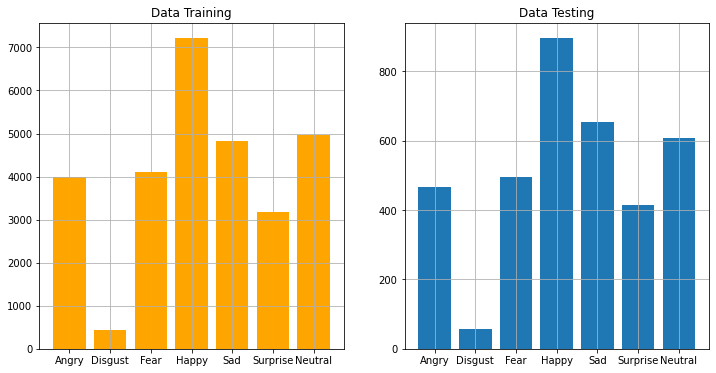

In [34]:
plot_compare_distributions(train_labels, test_labels, title1='Data Training', title2='Data Testing')

In [32]:
data_publ_test = data[data["Usage"]=="PublicTest"]
data_priv_test = data[data["Usage"]=="PrivateTest"]

data_testing = data_publ_test.append(data_priv_test)
data_training = data[data["Usage"]=="Training"]

C:\Users\ACER\AppData\Local\Temp\ipykernel_8352\3544583789.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_testing = data_publ_test.append(data_priv_test)


In [3]:
data_training.emotion.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [4]:
data_testing.emotion.value_counts()

3    1774
4    1247
6    1233
2    1024
0     958
5     831
1     111
Name: emotion, dtype: int64

In [5]:
print(train_angry.emotion.value_counts())
print(train_disgust.emotion.value_counts())
print(train_fear.emotion.value_counts())
print(train_happy.emotion.value_counts())
print(train_neutral.emotion.value_counts())
print(train_sad.emotion.value_counts())
print(train_surprise.emotion.value_counts())

NameError: name 'train_angry' is not defined

In [ ]:
print(train_angry.emotion.value_counts())
print(train_disgust.emotion.value_counts())
print(train_fear.emotion.value_counts())
print(train_happy.emotion.value_counts())
print(train_neutral.emotion.value_counts())
print(train_sad.emotion.value_counts())
print(train_surprise.emotion.value_counts())

In [6]:
train_angry = data_training[data["emotion"]==0]
train_disgust = data_training[data["emotion"]==1]
train_fear = data_training[data["emotion"]==2]
train_happy = data_training[data["emotion"]==3]
train_sad = data_training[data["emotion"]==4]
train_surprise = data_training[data["emotion"]==5]
train_neutral = data_training[data["emotion"]==6]

test_angry = data_testing[data["emotion"]==0]
test_disgust = data_testing[data["emotion"]==1]
test_fear = data_testing[data["emotion"]==2]
test_happy = data_testing[data["emotion"]==3]
test_sad = data_testing[data["emotion"]==4]
test_surprise = data_testing[data["emotion"]==5]
test_neutral = data_testing[data["emotion"]==6]

C:\Users\ACER\AppData\Local\Temp\ipykernel_8352\2862922807.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_angry = data_training[data["emotion"]==0]
C:\Users\ACER\AppData\Local\Temp\ipykernel_8352\2862922807.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_disgust = data_training[data["emotion"]==1]
C:\Users\ACER\AppData\Local\Temp\ipykernel_8352\2862922807.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_fear = data_training[data["emotion"]==2]
C:\Users\ACER\AppData\Local\Temp\ipykernel_8352\2862922807.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_happy = data_training[data["emotion"]==3]
C:\Users\ACER\AppData\Local\Temp\ipykernel_8352\2862922807.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_sad = data_training[data["emotion"]==4]
C:\Users\ACER\AppData\Local\Temp\ipykernel_835

In [7]:
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [4]:
import numpy as np

def convert2image(row):
    pixels = row['pixels']
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48))
    image[:,:,] = img
    return image.astype(np.uint8)

In [5]:
import cv2

def imwrite_img(data, loc, usage, emotion):
    count = 1
    for i in range(0, data.shape[0]):
        face = data.iloc[i]
        img = convert2image(face)
        cv2.imwrite(r'../dataset-FER2013/img-dataset/'+"%s/"%(loc)+"%s_%s%d.jpg"%(emotion,usage,count) +'.jpg',img)
        count+=1   

In [25]:
import os

os.mkdir("../dataset-FER2013/img-dataset/training/angry/")
os.mkdir("../dataset-FER2013/img-dataset/training/disgust/")
os.mkdir("../dataset-FER2013/img-dataset/training/fear/")
os.mkdir("../dataset-FER2013/img-dataset/training/happy/")
os.mkdir("../dataset-FER2013/img-dataset/training/sad/")
os.mkdir("../dataset-FER2013/img-dataset/training/surprise/")
os.mkdir("../dataset-FER2013/img-dataset/training/neutral/")

os.mkdir("../dataset-FER2013/img-dataset/testing/angry/")
os.mkdir("../dataset-FER2013/img-dataset/testing/disgust/")
os.mkdir("../dataset-FER2013/img-dataset/testing/fear/")
os.mkdir("../dataset-FER2013/img-dataset/testing/happy/")
os.mkdir("../dataset-FER2013/img-dataset/testing/sad/")
os.mkdir("../dataset-FER2013/img-dataset/testing/surprise/")
os.mkdir("../dataset-FER2013/img-dataset/testing/neutral/")

In [22]:
imwrite_img(train_angry, 'training/angry/', "training", "angry")
imwrite_img(train_disgust, 'training/disgust/', "training", "disgust")
imwrite_img(train_fear, 'training/fear/', "training", "fear")
imwrite_img(train_happy, 'training/happy/', "training", "happy")
imwrite_img(train_sad, 'training/sad/', "training", "sad")
imwrite_img(train_surprise, 'training/surprise/', "training", "surprise")
imwrite_img(train_neutral, 'training/neutral/', "training", "neutral")

imwrite_img(test_angry, 'testing/angry/', "testing", "angry")
imwrite_img(test_disgust, 'testing/disgust/', "testing", "disgust")
imwrite_img(test_fear, 'testing/fear/', "testing", "fear")
imwrite_img(test_happy, 'testing/happy/', "testing", "happy")
imwrite_img(test_sad, 'testing/sad/', "testing", "sad")
imwrite_img(test_surprise, 'testing/surprise/', "testing", "surprise")
imwrite_img(test_neutral, 'testing/neutral/', "testing", "neutral")